## Read gps and detections data

In [1]:
import math

def find_arguments(angle,dir,distance):
    # Calculate the y and x coordinates
    y = distance * math.sin(angle)
    x = distance * math.cos(angle)
    cam1_pos = []
    cam2_pos = []
    if dir == True:
        cam1_pos.append(x * -1.0)
        cam1_pos.append(y) 
        cam2_pos.append(x)
        cam2_pos.append(y * -1.0)
    else:
        cam1_pos.append(y)
        cam1_pos.append(x * -1.0) 
        cam2_pos.append(y * -1.0)
        cam2_pos.append(x)   

    return cam1_pos, cam2_pos

def add_distance_to_gps(original_latitude, original_longitude, x_distance_meters, y_distance_meters):
    # Earth's radius in meters
    earth_radius = 6378137
    # Calculate change in latitude (in radians)
    dlat = y_distance_meters / earth_radius
    # Calculate change in longitude (in radians)
    dlon = x_distance_meters / (earth_radius * math.cos(math.radians(original_latitude)))
    # New latitude and longitude values
    new_latitude = original_latitude + math.degrees(dlat)
    new_longitude = original_longitude + math.degrees(dlon)

    return new_latitude, new_longitude

## Get strawberry beds locations. Salinas 2022.

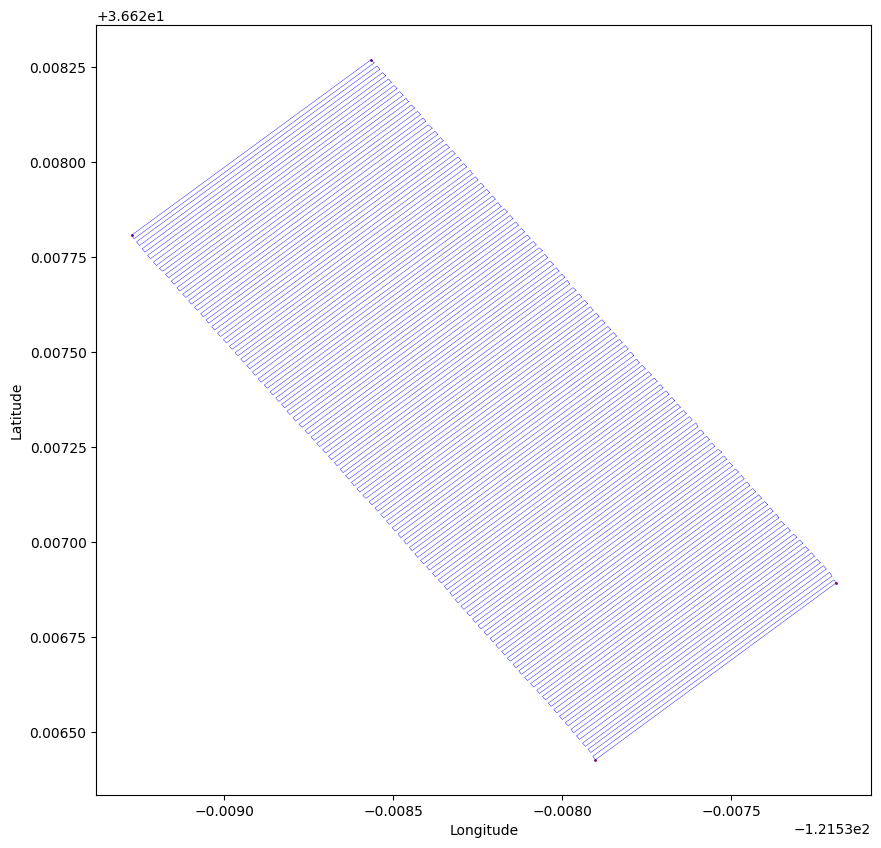

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Read the CSV file into a DataFrame
file_path = '/Users/andres/Documents/strawberry-forecasting/data/llh_map_spence2022.csv'
df = pd.read_csv(file_path)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 10))
_lat = []
_lon = []
# Iterate through pairs of rows to draw rectangles
j = 0
#for i in range(0, 1):
_clat = []
_clon = []
for i in range(0, len(df) - 1, 2):
    #print(i)
    # Extract coordinates for the rectangle
    lat1 = (df.loc[i, 'lat_ND'])
    lon1 = (df.loc[i, ' lon_ND'])
    _lat.append(lat1)
    _lon.append(lon1)
    lat2 = (df.loc[i, ' lat_FD'])
    lon2 = (df.loc[i, ' lon_FD'])   
    _lat.append(lat2)
    _lon.append(lon2)
    lat3 = (df.loc[i+1, ' lat_FD'])
    lon3 = (df.loc[i+1, ' lon_FD'])
    _lat.append(lat3)
    _lon.append(lon3)
    lat4 = (df.loc[i+1, 'lat_ND'])
    lon4 = (df.loc[i+1, ' lon_ND'])
    _lat.append(lat4)
    _lon.append(lon4)
    _lat.append(lat1)
    _lon.append(lon1)
    if i == 0:
        _clat.append(lat1)
        _clon.append(lon1)
        _clat.append(lat2)
        _clon.append(lon2)
        #print(_lat,_lon)
    elif i==160:
        _clat.append(lat3)
        _clon.append(lon3)
        _clat.append(lat4)
        _clon.append(lon4)
    if True:
        ax.plot(_lon[j:j+5], _lat[j:j+5], color='blue', linewidth=0.3)
    j+= 5
    # Calculate width and height of the rectangle
    #width = abs(end_vertex[1] - start_vertex[1])
    #height = abs(end_vertex[0] - start_vertex[0])
    

    # Create a rectangle patch and add it to the plot
#ax.scatter(_lat[0:], _lon[0:], s = 1)
#ax.plot(_lat[0:2], _lon[0:2])
#ax.plot(_lat[0:5], _lon[0:5])
# Set axis labels and title

#ax.plot(_fruit_lon[:len(_fruit_lon)//1],_fruit_lat[:len(_fruit_lat)//1], color='cyan', linewidth=0.3)
#ax.scatter(_agkit_lon, _agkit_lat, s=1, color='orange')
#ax.scatter(_fruit_lon, _fruit_lat, s=0.1, color='orange')
ax.scatter(_clon, _clat, s = 1, color='purple')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#ax.set_title('Rectangles on Map')
plt.savefig('/Users/andres/Documents/strawberry-forecasting/images/boxes.pdf', dpi=600)

# Show the plot
plt.show()




In [4]:
df

,lat_ND,lon_ND,alt_ND,lat_FD,lon_FD,alt_FD
0,36.626892,-121.537189,14.881570,36.626427,-121.537901,14.066948
1,36.626900,-121.537195,14.866689,36.626436,-121.537909,13.982932
2,36.626910,-121.537201,14.881738,36.626446,-121.537915,13.857299
3,36.626920,-121.537208,14.884674,36.626455,-121.537923,13.850122
4,36.626929,-121.537218,14.888437,36.626463,-121.537931,13.866943
...,...,...,...,...,...,...
158,36.628243,-121.538539,14.171894,36.627780,-121.539251,13.189643
159,36.628252,-121.538547,14.223707,36.627789,-121.539260,13.217721
160,36.628260,-121.538556,14.202334,36.627797,-121.539267,13.248062
161,36.628268,-121.538565,14.185484,36.627806,-121.539275,13.276998


Valid bag file list by date:
- 06/17
- 06/21
- 06/28
- 07/05
- 07/08
- 07/15
- 07/19
- 07/26
- 07/29
- 08/02
- 08/05
- 08/09
- 08/12

---------- second agkit (used different distance)
- 08/29
- 09/01
- 09/13
- 09/15
- 09/20
- 09/22

In [140]:
month = '09'
day = '22'
year = '2022'
join_date = '-'.join([month, day, year])
print(join_date)

09-22-2022


In [142]:
#gps_points = open("/data/andresmr/temp_data/gps_data_" + join_date + ".txt")
gps_points = open("/Users/andres/Documents/yield_data/valid_gps_data_" + join_date + ".txt")
#gps_points = open("/Users/andres/Documents/ROS/detections_06-28-2023.txt")
locations = []
locations = gps_points.readlines()

#gps_points = open("/data/andresmr/temp_data/gps_data_" + join_date + ".txt")
detections = open("/Users/andres/Documents/yield_data/detections_" + join_date + ".txt")
#detections = open("/Users/andres/Documents/ROS/valid_gps_data_06-28-2023.txt")
predictions = []
predictions = detections.readlines()

## Get gps points inside block

In [143]:
import numpy as np
import csv
import pandas as pd


_distance = 1.27 # for 2nd agkit
#distance = 0.96 # for 1st agkit

# Initialize list for gps points, box index, and fruit counts
_agkit_lat = []
_agkit_lon = []
_fruit_lat = []
_fruit_lon = []
_red_count = []
_pink_count = []
_lw_count = []
_sw_count = []
_green_count = []
_flower_count = []

_rectangle_idx = []
limit_ = len(locations)
for idx,global_pos in enumerate(locations): # lat -> y, lon -> x
    if idx < limit_ - 1:
    #if idx < 32000:
    #if idx <10:
    #if True:
        # extract lat, lon, bearing and direction from "location"
        lat = float(global_pos.split(',')[1])
        lon = float(global_pos.split(',')[2])
        
        bearing = float(global_pos.split(',')[4])
        dir = global_pos.split(',')[3]
        # Get right location of fruit according to camera id and direction of tractor
        # Cam 1 is left camera
        if dir == 'True':
            cam1, cam2 = find_arguments(bearing,True,distance)
        else:
            cam1, cam2 = find_arguments(bearing,False,distance)
        # Get camera id from the predictions
        cam_id = int(predictions[idx].split(',')[7])
        # Get new latitude and longitude adding distance from gps to plants (left or right side)
        if cam_id == 1:
            n_lat,n_lon = add_distance_to_gps(lat, lon, cam1[0], cam1[1])
        else:
            n_lat,n_lon = add_distance_to_gps(lat, lon, cam2[0], cam2[1])
        # Get counts for all stages
        results =  predictions[idx]
        det_red = float(results.split(",")[5])
        det_flower = float(results.split(",")[1].split('[')[1])
        det_green = float(results.split(",")[2])
        det_lw = float(results.split(",")[3])
        det_pink = float(results.split(",")[4])
        det_sw = float(results.split(",")[6].split("]")[0])

        # Iterate over boxes
        rectangle_idx = 1
        for i in range(0, len(df) - 1, 2):
            _clat = []
            _clon = []
            # Extract coordinates for ith box
            lat1 = (df.loc[i, 'lat_ND'])
            lon1 = (df.loc[i, ' lon_ND'])
            _clat.append(lat1)
            _clon.append(lon1)
            lat2 = (df.loc[i, ' lat_FD'])
            lon2 = (df.loc[i, ' lon_FD'])   
            _clat.append(lat2)
            _clon.append(lon2)
            lat3 = (df.loc[i+1, ' lat_FD'])
            lon3 = (df.loc[i+1, ' lon_FD'])
            _clat.append(lat3)
            _clon.append(lon3)
            lat4 = (df.loc[i+1, 'lat_ND'])
            lon4 = (df.loc[i+1, ' lon_ND'])
            _clat.append(lat4)
            _clon.append(lon4)
            # Check if gps point is inside ith box
            D1 = (_clon[1] - _clon[0]) * (n_lat - _clat[0]) - (n_lon - _clon[0]) * (_clat[1] - _clat[0])
            D2 = (_clon[2] - _clon[1]) * (n_lat - _clat[1]) - (n_lon - _clon[1]) * (_clat[2] - _clat[1])
            D3 = (_clon[3] - _clon[2]) * (n_lat - _clat[2]) - (n_lon - _clon[2]) * (_clat[3] - _clat[2])
            D4 = (_clon[0] - _clon[3]) * (n_lat - _clat[3]) - (n_lon - _clon[3]) * (_clat[0] - _clat[3])

            # Save gps point, box index and fruit counts
            if (D1<0 and D2<0 and D3<0 and D4<0):
                _agkit_lat.append(lat)
                _agkit_lon.append(lon)
                _fruit_lat.append(n_lat)
                _fruit_lon.append(n_lon)
                _red_count.append(det_red)
                _pink_count.append(det_pink)
                _lw_count.append(det_lw)
                _sw_count.append(det_sw)
                _green_count.append(det_green)
                _flower_count.append(det_flower)
                _rectangle_idx.append(rectangle_idx)
            rectangle_idx += 1

# Sample data_lists
data_lists = [
    _fruit_lat,
    _fruit_lon,
    _red_count,
    _pink_count,
    _lw_count,
    _sw_count,
    _green_count,
    _flower_count,
    _rectangle_idx
]

# Specify the CSV file path
csv_file_path = '/Users/andres/Documents/strawberry-forecasting/data/raw_counts/' + join_date + '.csv'
# Write data to the CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    # Write data rows
    for row in zip(*data_lists):
        csv_writer.writerow(row)

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, header=None)
# Add titles to the columns
column_titles = ['lat', 'lon', 'red', 'pink', 'lw', 'sw', 'green', 'flower', 'idx']
df.columns = column_titles
# Save the DataFrame with column titles back to the CSV file
df.to_csv(csv_file_path, index=False)

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
# Group the DataFrame by the index (ninth column)
grouped_df = df.groupby('idx')

# Initialize a list to store the total counts for each fruit stage in each group
total_counts_per_group = []
for group_idx in range(1, 82):
    # Get the current group, or create a DataFrame with zeros if no data for the current index
    group_data = grouped_df.get_group(group_idx) if group_idx in grouped_df.groups else pd.DataFrame(0.0, index=[0], columns=df.columns + ['idx'])
    
    # Extract data for the current group
    group_data = group_data.iloc[:, 2:8]  # Columns 3 to 8 (fruit stage counts)
    
    # Compute the total count for each fruit stage in the current group
    total_counts = group_data.sum().tolist() + [group_idx]  # Add the box index at the end
    
    # Append the total counts to the list
    total_counts_per_group.append(total_counts)

# Specify the CSV file path
new_csv_file_path = '/Users/andres/Documents/strawberry-forecasting/data/raw_counts/' + join_date + '_blocks.csv'
# Write data to the CSV file
with open(new_csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    # Write data rows
    for idx,row in enumerate(total_counts_per_group):
        csv_writer.writerow(row)
# Read the CSV file into a DataFrame
df = pd.read_csv(new_csv_file_path, header=None)       

## Plot locations inside block

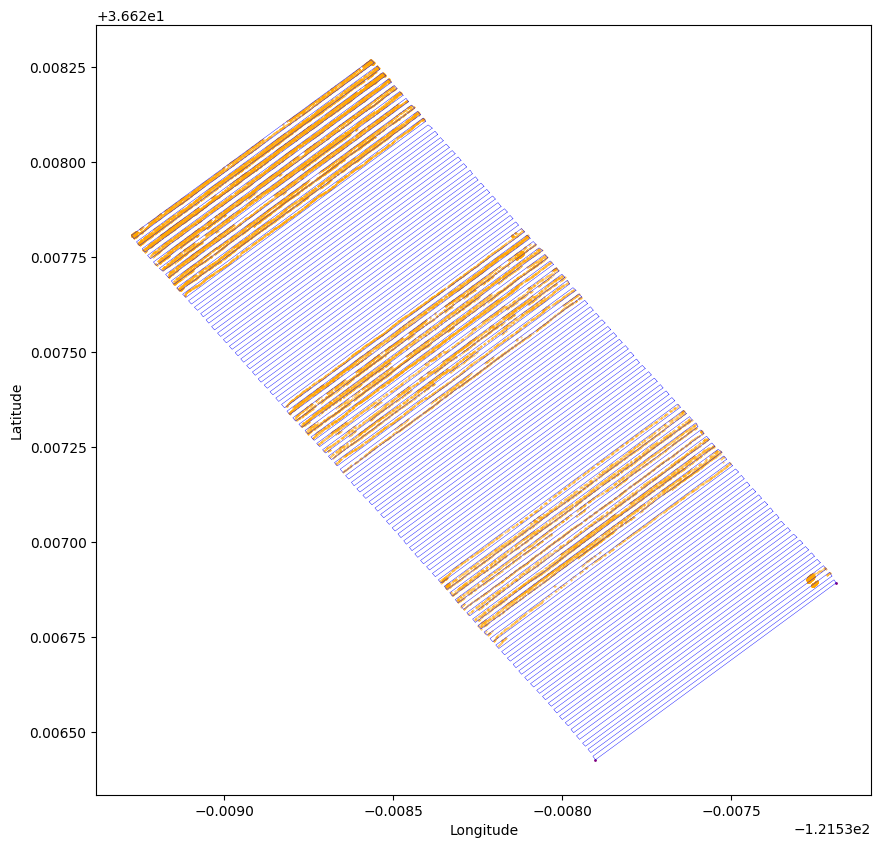

In [144]:
# Read the CSV file into a DataFrame
file_path = '/Users/andres/Documents/strawberry-forecasting/data/llh_map_spence2022.csv'
df = pd.read_csv(file_path)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 10))
_lat = []
_lon = []
# Iterate through pairs of rows to draw rectangles
j = 0
#for i in range(0, 1):
_clat = []
_clon = []
for i in range(0, len(df) - 1, 2):
    # Extract coordinates for the rectangle
    lat1 = (df.loc[i, 'lat_ND'])
    lon1 = (df.loc[i, ' lon_ND'])
    _lat.append(lat1)
    _lon.append(lon1)
    lat2 = (df.loc[i, ' lat_FD'])
    lon2 = (df.loc[i, ' lon_FD'])   
    _lat.append(lat2)
    _lon.append(lon2)
    lat3 = (df.loc[i+1, ' lat_FD'])
    lon3 = (df.loc[i+1, ' lon_FD'])
    _lat.append(lat3)
    _lon.append(lon3)
    lat4 = (df.loc[i+1, 'lat_ND'])
    lon4 = (df.loc[i+1, ' lon_ND'])
    _lat.append(lat4)
    _lon.append(lon4)
    _lat.append(lat1)
    _lon.append(lon1)
    if i == 0:
        _clat.append(lat1)
        _clon.append(lon1)
        _clat.append(lat2)
        _clon.append(lon2)
    elif i==160:
        _clat.append(lat3)
        _clon.append(lon3)
        _clat.append(lat4)
        _clon.append(lon4)
    if True:
        ax.plot(_lon[j:j+5], _lat[j:j+5], color='blue', linewidth=0.3)
    j+= 5
    # Calculate width and height of the rectangle
    #width = abs(end_vertex[1] - start_vertex[1])
    #height = abs(end_vertex[0] - start_vertex[0])
    

    # Create a rectangle patch and add it to the plot
    #rectangle = patches.Rectangle(start_vertex, width, height, edgecolor='blue', facecolor='none', linewidth=2)
    #ax.add_patch(rectangle)
#ax.scatter(_lat[0:], _lon[0:], s = 1)
#ax.plot(_lat[0:2], _lon[0:2])
#ax.plot(_lat[0:5], _lon[0:5])
# Set axis labels and title

#ax.plot(_fruit_lon[:len(_fruit_lon)//1],_fruit_lat[:len(_fruit_lat)//1], color='cyan', linewidth=0.3)
#ax.scatter(_agkit_lon, _agkit_lat, s=1, color='orange')
ax.scatter(_fruit_lon, _fruit_lat, s=0.1, color='orange')
ax.scatter(_clon[0:2], _clat[0:2], s = 1, color='purple')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#ax.set_title('Rectangles on Map')
plt.savefig('/Users/andres/Documents/strawberry-forecasting/images/'+join_date+'_blocks.pdf', dpi=600)

# Show the plot
plt.show()

In [8]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in meters
    R = 6371000.0
    
    # Convert coordinates from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Calculate the differences in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Distance in meters
    distance = R * c
    
    return distance

# Example usage
#lon1 = _clon[0]
#lon2 = _clon[1]
#lat1 = _clat[0]
#lat2 = _clat[1]

p_lat = [36.62689207540415, 36.62642715533619, 36.62643629457935, 36.6269003311879, 36.62689207540415] 
p_lon = [-121.537188871832, -121.5379010810892, -121.5379088676869, -121.53719491591032, -121.537188871832]


distance = haversine(p_lat[1], p_lon[1], p_lat[2], p_lon[2])
print(distance)
distance = haversine(lat1, lon1, lat2, lon2)
print(distance)

1.2310875154633876
81.67942621513637


## Discrete blocks

In [58]:

# Replace 'your_file_path.csv' with the actual path to your CSV file
file_path = '/Users/andres/Documents/strawberry-forecasting/data/raw_counts/06-17-2022.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Specify the desired index value
desired_idx = 80

# Filter the DataFrame based on the specified index
selected_data = df[df['idx'] == desired_idx]

# Initialize a list to store tuples
_counts = []
_blat = []
_blon = []
# Iterate over the selected rows
for _, row in selected_data.iterrows():
    _blat.append(row['lat'])
    _blon.append(row['lon'])
    _counts.append(row['red'])

# Print the results
#for result_tuple in result_list:
    ##print(result_tuple)
len(_blon)

1330

[36.62824300440688, 36.62777956733146, 36.62778906991201, 36.62825175223362, 36.62824300440688] [-121.53853949143024, -121.53925123815068, -121.53926005118863, -121.53854742498666, -121.53853949143024]


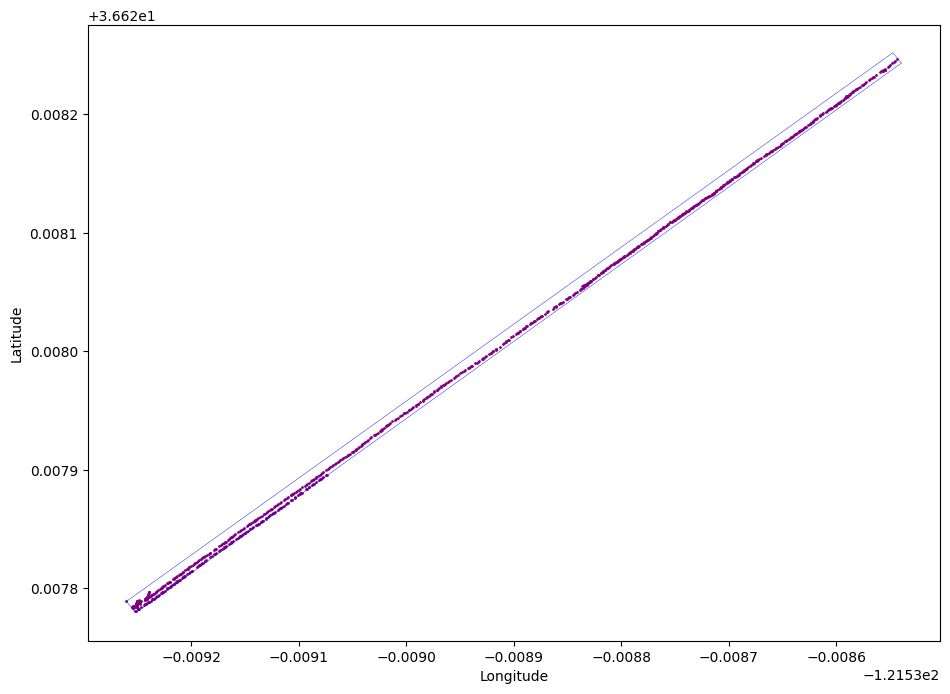

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Read the CSV file into a DataFrame
file_path = '/Users/andres/Documents/strawberry-forecasting/data/llh_map_spence2022.csv'
df = pd.read_csv(file_path)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(11, 8))
_lat = []
_lon = []
# Iterate through pairs of rows to draw rectangles
j = 0
#for i in range(0, 1):
#'''
_lat_i = []
_lon_i = []

for i in range(0, len(df) - 1, 2):
    #print(i)
    # Extract coordinates for the rectangle
    lat1 = (df.loc[i, 'lat_ND'])
    lon1 = (df.loc[i, ' lon_ND'])
    _lat.append(lat1)
    _lon.append(lon1)
    lat2 = (df.loc[i, ' lat_FD'])
    lon2 = (df.loc[i, ' lon_FD'])   
    _lat.append(lat2)
    _lon.append(lon2)
    lat3 = (df.loc[i+1, ' lat_FD'])
    lon3 = (df.loc[i+1, ' lon_FD'])
    _lat.append(lat3)
    _lon.append(lon3)
    lat4 = (df.loc[i+1, 'lat_ND'])
    lon4 = (df.loc[i+1, ' lon_ND'])
    _lat.append(lat4)
    _lon.append(lon4)
    _lat.append(lat1)
    _lon.append(lon1)
    if i == 158:
        _lat_i.append(lat1)
        _lon_i.append(lon1)
        _lat_i.append(lat2)
        _lon_i.append(lon2)
        _lat_i.append(lat3)
        _lon_i.append(lon3)
        _lat_i.append(lat4)
        _lon_i.append(lon4)
        _lat_i.append(lat1)
        _lon_i.append(lon1)
        print(_lat_i,_lon_i)
    if False:
        ax.plot(_lon[j:j+5], _lat[j:j+5], color='blue', linewidth=0.3)
    j+= 5
    # Calculate width and height of the rectangle
    #width = abs(end_vertex[1] - start_vertex[1])
    #height = abs(end_vertex[0] - start_vertex[0])
    

    # Create a rectangle patch and add it to the plot
    #rectangle = patches.Rectangle(start_vertex, width, height, edgecolor='blue', facecolor='none', linewidth=2)
    #ax.add_patch(rectangle)
#'''
#ax.scatter(_lat[0:], _lon[0:], s = 1)
#ax.plot(_lat[0:2], _lon[0:2])
#ax.plot(_lat[0:5], _lon[0:5])
# Set axis labels and title

#ax.plot(_fruit_lon[:len(_fruit_lon)//1],_fruit_lat[:len(_fruit_lat)//1], color='cyan', linewidth=0.3)
#ax.scatter(_agkit_lon, _agkit_lat, s=1, color='orange')
#ax.scatter(_fruit_lon, _fruit_lat, s=0.1, color='orange')
ax.scatter(_blon[0:900], _blat[0:900], s = 1, color='purple')
ax.scatter(_lon_i[2], _lat_i[2], s = 1, color='purple')
ax.plot(_lon_i, _lat_i, color='blue', linewidth=0.3)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#ax.set_title('Rectangles on Map')
plt.savefig('/Users/andres/Documents/strawberry-forecasting/images/boxes.pdf', dpi=600)

# Show the plot
plt.show()



In [45]:
min_y = int((_lat_i[1] - 36.62) * 1000000)
max_y = int((_lat_i[3] - 36.62) * 1000000)

min_x = int((_lon_i[0] + 121.53) * 1000000)
max_x = int((_lon_i[2] + 121.53) * 1000000)

off_y = max_y - min_y
off_x = abs(max_x - min_x)
min_x, max_x
#off_x, off_y
#dim_x = 
#dim_y =

(-8539, -9260)

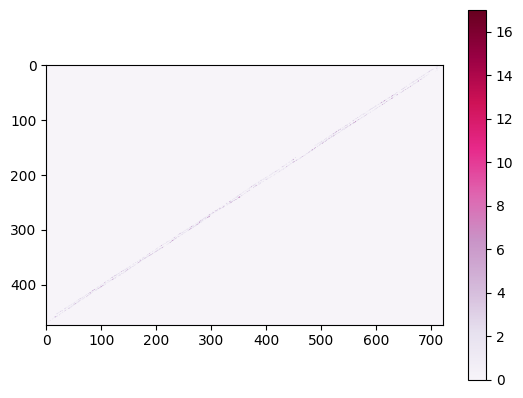

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define the size of the matrix
rows, cols = off_y + 1, off_x + 1

# Initialize an empty matrix
matrix = np.zeros((rows, cols))

for idx, pos in enumerate(_gps_points):
    lat_r = int((pos[0] - 36.62) * 1000000) - min_y
    lon_r = int((pos[1] + 121.53) * -1000000) + min_x
    matrix[lat_r, lon_r] = _counts[idx]

# Display the matrix as an image using matplotlib
fig, ax = plt.subplots()
img = ax.imshow(matrix, cmap='PuRd')  # You can choose a different colormap
plt.colorbar(img)  # Add a colorbar for reference
plt.show()

# Save the figure
fig.savefig('/Users/andres/Documents/strawberry-forecasting/images/_discrete.pdf', dpi=600)


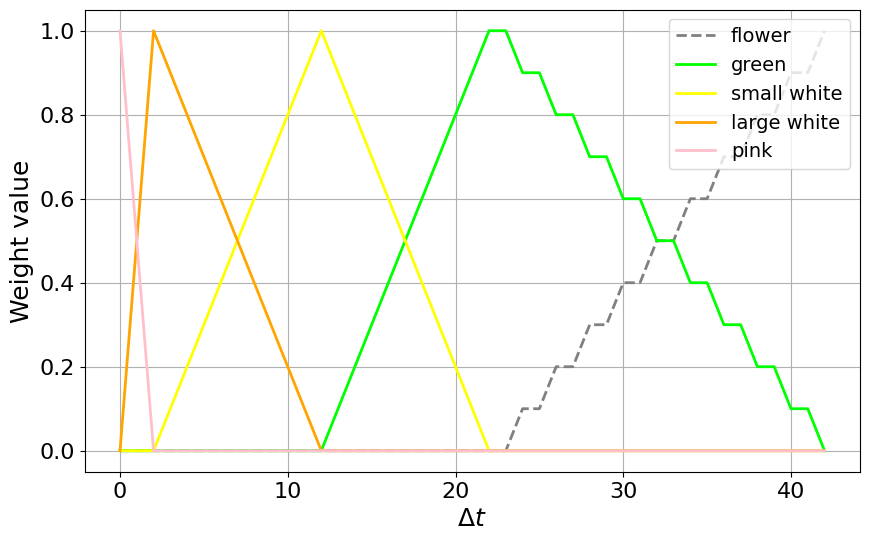

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Example CSV file 'data.csv' structure:
# Column1,Column2,Column3
# 0.1,0.5,0.3
# 0.2,0.6,0.4
# 0.3,0.7,0.5
# ...

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('weights.csv')
df = df.iloc[:-5] 


# Step 2: Plot each column's data except the last column
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

labels = ['flower', 'green', 'small white', 'large white', 'pink'] 
markers = ['--','-','-','-','-']
colors = ['gray', 'lime', 'yellow', 'orange', 'pink']

# Iterate over all columns except the last one
for column, label,marker,color in zip(df.columns[:-1],labels,markers,colors):
    #label = f'Curve {i+1}'  # Example label format
    plt.plot(df.index, df[column], linestyle=marker, label=label, color=color, linewidth=2)

# Step 3: Add legend with column names
plt.legend(fontsize=14)

# Add labels and title
plt.xlabel('$\Delta t$',fontsize=18)
plt.ylabel('Weight value',fontsize=18)
#plt.title('')
plt.xticks(fontsize=16)  # Adjust fontsize as needed
plt.yticks(fontsize=16)  # Adjust fontsize as needed
# Show plot
plt.grid(True)
plt.savefig('/Users/andres/Documents/yield_data/images/2022/old_weights.pdf', dpi=300)
plt.show()

